In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.datasets import load_breast_cancer
x, y = load_breast_cancer(return_X_y=True)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Perceptron

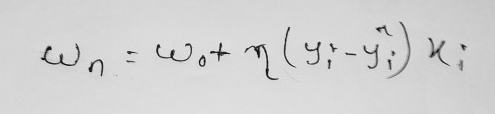

In [6]:
class Perceptron:
    def __init__(self, epochs, lr):
        self.epochs = epochs
        self.lr = lr
        self.weights = None

    def fit(self, x_train, y_train):
        x_train = np.insert(x_train, 0, 1, axis=1)
        weights = np.ones(x_train.shape[1])

        for _ in range(self.epochs):
            random = np.random.randint(0,x_train.shape[0])
            y_hat = self.step(np.dot(x_train[random], weights))
            weights = weights + self.lr * (y_train[random] - y_hat) * x_train[random]

        self.weights = weights
    
    def predict(self, x_test):
        x_test = np.insert(x_test, 0, 1, axis=1)
        predictions = np.dot(x_test, self.weights)
        return self.step(predictions)
    
    def step(self, z):
        return np.where(z > 0, 1, 0)

In [10]:
from sklearn.metrics import accuracy_score

p = Perceptron(epochs=100, lr=0.01)
p.fit(x_train, y_train)
y_pred = p.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.4298245614035088


### Perceptron with Sigmoid

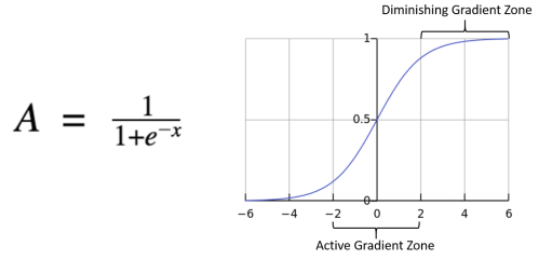

In [15]:
class SigmoidPerceptron:
    def __init__(self, epochs, lr):
        self.epochs = epochs
        self.lr = lr
        self.weights = None

    def fit(self, x_train, y_train):
        x_train = np.insert(x_train, 0, 1, axis=1)
        weights = np.ones(x_train.shape[1])

        for _ in range(self.epochs):
            random = np.random.randint(0, x_train.shape[0])
            y_hat = self.sigmoid(np.dot(x_train[random], weights))
            weights = weights + self.lr * (y_train[random]-y_hat)*x_train[random]

        self.weights = weights

    def predict(self, x_test, threshold=0.5):
        x_test = np.insert(x_test, 0, 1, axis=1)
        prediction = np.dot(x_test, self.weights)
        probabilities = self.sigmoid(prediction)
        binary_predictions = (probabilities >= threshold).astype(int)
        return binary_predictions
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    
sp = SigmoidPerceptron(epochs=100, lr=0.01)
sp.fit(x_train, y_train)
y_pred = sp.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.6052631578947368


### Logistic Regression

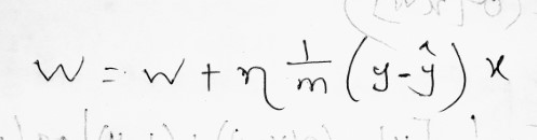

In [16]:
class MyLogisticRegression:
    def __init__(self, epochs, lr) -> None:
        self.epochs = epochs
        self.lr = lr
        self.weights = None
    
    def fit(self, x_train, y_train):
        x_train = np.insert(x_train, 0, 1, axis=1)
        self.weights = np.ones(x_train.shape[1])
        
        for _ in range(self.epochs):
            y_hat = self.sigmoid(np.dot(x_train, self.weights))
            self.weights = self.weights + self.lr * np.dot((y_train-y_hat), x_train)/x_train.shape[0]

    def predict(self, x_test, threshold=0.5):
        x_test = np.insert(x_test, 0, 1 , axis=1)
        prediction = np.dot(x_test, self.weights)
        probabilities = self.sigmoid(prediction)
        binary_predictions = (probabilities >= threshold).astype(int)
        return binary_predictions

    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    

mlr = MyLogisticRegression(epochs=1000, lr=0.01)
mlr.fit(x_train, y_train)
y_pred = mlr.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8771929824561403


In [17]:
# With Batch Gradient Descent
class CustomLogisticRegression:
    def __init__(self, epochs: int = 100, lr: float = 0.01):
        self.epochs = epochs
        self.lr = lr 
        self.W = None

    def sigmoid(self, z):
        # To avoid overflow
        z = np.clip(z, -500, 500)
        return 1 / (1+np.exp(-z))
    
    def fit(self, X_train: np.ndarray, y_train: np.ndarray)->None:
        self.W = np.random.rand(X_train.shape[1])
        for _ in range(self.epochs):
            for i in range(X_train.shape[0]):
                y_pred = self.sigmoid(X_train[i] @ self.W)
                error = (y_train[i] - y_pred)
                grad_W = (-1/X_train.shape[0]) * np.dot(X_train[i], error)
                self.W = self.W - self.lr * grad_W

    def predict(self, X_test: np.ndarray)->np.ndarray:
        pred = self.sigmoid((X_test @ self.W))
        return (pred >= 0.5).astype(int)
    

model = CustomLogisticRegression(epochs=100, lr=0.01)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9210526315789473